In [1]:
import sys
sys.path.append("/workspaces/mlp-playground/")

In [2]:
import os
import jax
import numpy as np

from jax import random
from matplotlib import pyplot as plt

In [3]:
from playground.sim_clr import constants, utils, data_prep, trainer

In [4]:
utils.download_pre_trained()

In [5]:
unlabeled_data, train_data_contrast = data_prep.get_stl_dataset(constants.DATASET_PATH)

Files already downloaded and verified
Files already downloaded and verified


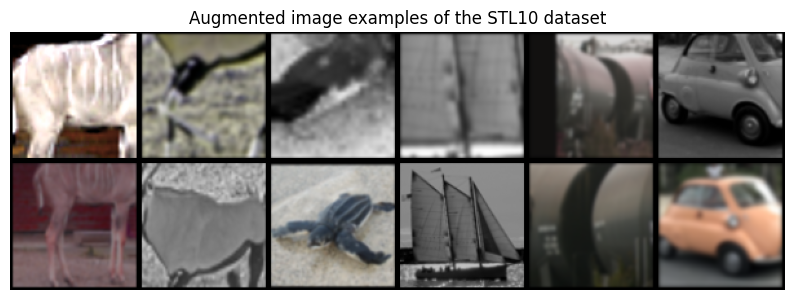

In [6]:
NUM_IMAGES = 6
imgs = np.stack([data_prep.parallel_augment(random.PRNGKey(idx), np.stack(unlabeled_data[idx][0], axis=0)) for idx in range(NUM_IMAGES)], axis=2)
imgs = (imgs + 1.0) / 2.0
img_grid = np.pad(imgs, ((0,0), (2,2), (0,0), (2,2), (0,0)))
img_grid = img_grid.reshape(img_grid.shape[0]*img_grid.shape[1],-1,img_grid.shape[-1])

plt.figure(figsize=(10,5))
plt.title('Augmented image examples of the STL10 dataset')
plt.imshow(img_grid)
plt.axis('off')
plt.show()
plt.close()

In [7]:
def train_logreg(batch_size, train_feats_data, test_feats_data, model_suffix, num_epochs=100, **kwargs):
    # Data loaders
    train_loader = data.DataLoader(train_feats_data, 
                                   batch_size=batch_size, 
                                   shuffle=True, 
                                   drop_last=False, 
                                   generator=torch.Generator().manual_seed(42),
                                   collate_fn=numpy_collate)
    test_loader = data.DataLoader(test_feats_data, 
                                  batch_size=batch_size, 
                                  shuffle=False, 
                                  drop_last=False,
                                  collate_fn=numpy_collate)

    # Create a trainer module with specified hyperparameters
    trainer = LGTrainer(exmp_imgs=next(iter(train_loader))[0],
                        model_suffix=model_suffix,
                        **kwargs)
    if not trainer.checkpoint_exists():  # Skip training if pretrained model exists
        trainer.train_model(train_loader, test_loader, num_epochs=num_epochs)
        trainer.load_model()
    else:
        trainer.load_model(pretrained=True)
    
    # Test best model on train and validation set
    train_result = trainer.eval_model(train_loader)
    test_result = trainer.eval_model(test_loader)
    result = {"train": train_result["acc"], "test": test_result["acc"]}
        
    return trainer, result

In [8]:
def train_simclr(num_epochs=500, **kwargs):
    # Create a trainer module with specified hyperparameters
    data_prep.get_data_loaders('', )
    sim_trainer = trainer.SimCLRTrainer(exmp_imgs=data_prep.parallel_augment(random.PRNGKey(0),
                                                       next(iter(train_loader))),
                            **kwargs)
    if not sim_trainer.checkpoint_exists():  # Skip training if pretrained model exists
        sim_trainer.train_model(train_loader, simclr_val_loader, num_epochs=num_epochs)
        sim_trainer.load_model()
    else:
        sim_trainer.load_model(pretrained=True)
    return trainer

In [ ]:
simclr_trainer = train_simclr(hidden_dim=128, 
                              lr=5e-4, 
                              temperature=0.07, 
                              weight_decay=1e-4, 
                              num_epochs=500)

Files already downloaded and verified
